wip max size 322034778 count  1570
peb max size 68599549 count  46333
rocks max size 68291213 count  1852
level max size 68601503 count  1833


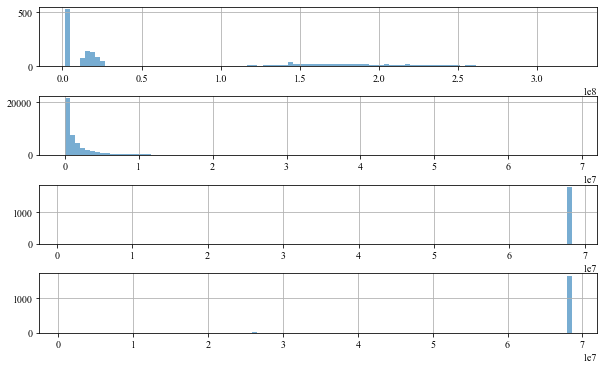

In [1]:
import re
import os
import csv
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import json
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from natsort import natsorted, ns
from scipy.fftpack import fft
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
%matplotlib inline



fig = plt.figure(figsize=(10, 6)) 
gs = gridspec.GridSpec(4, 1) 
gs.update(wspace=3, hspace=0.5) # set the spacing between axes. 
ax1= plt.subplot(gs[0])
ax2= plt.subplot(gs[1])
ax3= plt.subplot(gs[2])
ax4= plt.subplot(gs[3])




wip    = pd.read_csv("kv1B_histogram.txt", names=['size', 'filename'], delimiter=" ")
wip_count = len(wip)
print("wip max size", wip['size'].max(), "count ", wip_count)

peb    = pd.read_csv("peb1B_histogram.txt", names=['size', 'filename'], delimiter=" ")
peb_count = len(peb)
print("peb max size", peb['size'].max(), "count ", peb_count)

rocks  = pd.read_csv("rocks1B_histogram.txt", names=['size', 'filename'], delimiter=" ")
rocks_count = len(rocks)
print("rocks max size", rocks['size'].max(), "count ", rocks_count)

level  = pd.read_csv("level1B_histogram.txt", names=['size', 'filename'], delimiter=" ")
level_count = len(level)
print("level max size", level['size'].max(), "count ", level_count)

df = pd.DataFrame()
df['peb'] = peb['size']
df['wip'] = wip['size']
df['rocks'] = rocks['size']
df['level'] = level['size']

df['wip'].hist(bins=100, ax=ax1, alpha=0.6)
df['peb'].hist(bins=100, ax=ax2, alpha=0.6)
df['rocks'].hist(bins=100, ax=ax3, alpha=0.6)
df['level'].hist(bins=100, ax=ax4, alpha=0.6)



[<matplotlib.axes._subplots.AxesSubplot object at 0x1c269734d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c273e3d50>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c25c13dd0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c26a2db90>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c270b2250>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c27122b90>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c25c3c9d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c26dd1e50>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c26c58190>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c257cfa10>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c25534790>, <matplotlib.axes._subplots.AxesSubplot object at 0x1c270acd10>]
interval: 32.0 KB
interval: 1024.0 KB
interval: 16384.0 KB


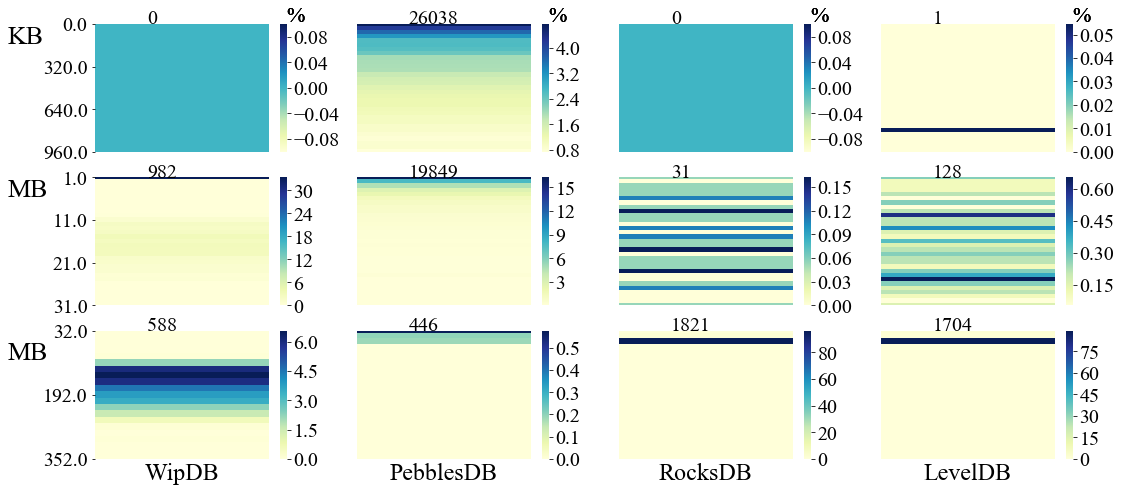

In [14]:
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

fig = plt.figure(figsize=(18, 8)) 
gs = gridspec.GridSpec(3, 4) 
# gs.update(wspace=0.42, hspace=0.06) # set the spacing between axes. 
axs = []
for i in range(3):
    for j in range(4):
        axs.append(plt.subplot(gs[i, j]))

print(axs)

bin_num  = [32 , 32,  32]
pivots   = [1 << 20, 32 << 20, 512 << 20]
units    = [float(1 << 10), float(1 << 20), float(1 << 20)]
units_label = ["KB", "MB", "MB"]
bins_group = []
colormap = cmap="YlGnBu"
split = 0
for i in range(len(pivots)):
    bin_pivots = []
    if i != 0:
        bin_pivots.append(bins_group[i-1][-1])
    else:
        bin_pivots.append(0)
    interval = pivots[i] / bin_num[i]
    print("interval:" , interval / 1024.0 , "KB")
    
    ylabels = []
    while(split < pivots[i]):
        if split + interval > bin_pivots[-1]:
            bin_pivots.append(split + interval)
        ylabels.append(split)
        split = split + interval
        
    bins_group.append(bin_pivots)
    his=pd.DataFrame()
    bin_pivots = [x / units[i] for x in bin_pivots]
    
    his['wip'] = pd.cut(df['wip']/units[i], bins=bin_pivots).value_counts().sort_index() 
    his['wip_percent'] = his['wip'] / wip_count * 100.0
    his['peb'] = pd.cut(df['peb']/units[i], bins=bin_pivots).value_counts().sort_index()
    his['peb_percent'] = his['peb'] / peb_count * 100.0
    his['rocks'] = pd.cut(df['rocks']/units[i], bins=bin_pivots).value_counts().sort_index()
    his['rocks_percent'] = his['rocks']  / rocks_count * 100.0
    his['level'] = pd.cut(df['level']/units[i], bins=bin_pivots).value_counts().sort_index()
    his['level_percent'] = his['level']  / level_count * 100.0
    
    his['size'] = bin_pivots[:-1]
    his = his.set_index('size')

    cbar_ = True
#     if his['wip'].sum() == 0:
#         cbar_= False
    sns.heatmap(his[['wip_percent']], ax=axs[i*4  + 0], cmap=colormap, yticklabels=10, cbar=cbar_)
    sns.heatmap(his[['peb_percent']], ax=axs[i*4  + 1], cmap=colormap)
#     if his['rocks'].sum() == 0:
#         cbar_= False
    sns.heatmap(his[['rocks_percent']], ax=axs[i*4  + 2], cmap=colormap, cbar=cbar_)
    sns.heatmap(his[['level_percent']], ax=axs[i*4  + 3], cmap=colormap)
    
    
    for j in range(4):
        axs[i*4 + j].set_ylabel("") 
        axs[i*4 + j].set_xticks([])   
        axs[j].text(1.1, 0, "%", fontsize=22)
        
    axs[i*4 + 1].set_yticks([])    
    axs[i*4 + 2].set_yticks([])    
    axs[i*4 + 3].set_yticks([]) 
    
    if i == 2:
        axs[i*4 + 0].set_xlabel("WipDB", fontsize=24)    
        axs[i*4 + 1].set_xlabel("PebblesDB",fontsize=24)    
        axs[i*4 + 2].set_xlabel("RocksDB",fontsize=24)    
        axs[i*4 + 3].set_xlabel("LevelDB",fontsize=24)    
        
    axs[i*4 + 0].text(0.3, 0.5, his['wip'].sum(), fontsize=20)    
    axs[i*4 + 1].text(0.3, 0.5, his['peb'].sum(), fontsize=20)    
    axs[i*4 + 2].text(0.3, 0.5, his['rocks'].sum(), fontsize=20)    
    axs[i*4 + 3].text(0.3, 0.5, his['level'].sum(), fontsize=20)    
    axs[i*4 + 0].tick_params(axis='y', rotation=0)
    axs[i*4 + 0].text(-0.5, 5, units_label[i], fontsize=26)
    
    

plt.savefig('fileheatmap.pdf', bbox_inches='tight')